In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

from warnings import filterwarnings
filterwarnings('ignore')

D:\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [65]:
# Read the data
data = pd.read_csv("heart.csv")
df = data.copy()
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [66]:
# Shape oof dataset
df.shape

(303, 14)

In [67]:
# Getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [72]:
# Some statistics of features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [74]:
# Checking duplicated values and clear them
df[df.duplicated() == True]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [75]:
df.drop_duplicates(inplace = True)

In [76]:
df.shape

(302, 14)

In [77]:
# Cheking missing values
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [78]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [82]:
# Visualization of corelation between features
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


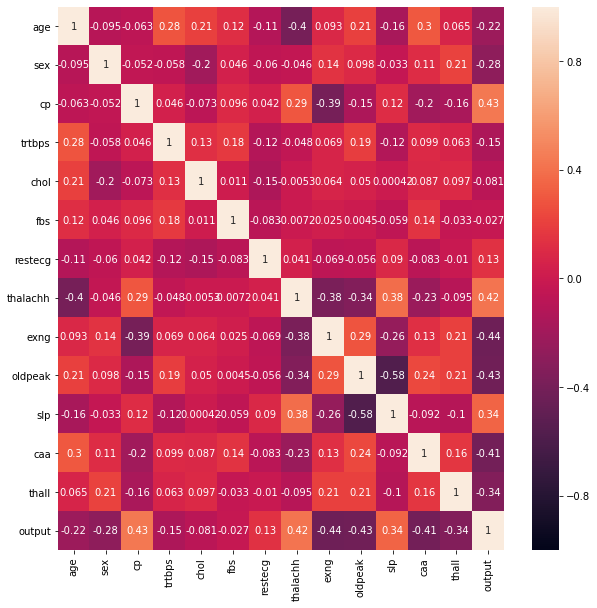

In [80]:
plt.figure(figsize= (10,10))
sns.heatmap(df.corr(), annot = True, cbar = True, vmin = -1, vmax = 1);

### Data Preprocessing and Visualization

In [85]:
df["sex"] = df["sex"].replace({1: "male", 0: "female"})
df["cp"] = df["cp"].replace({0 : "typical_angina", 1: "atypical_angina", 2: "non_anginal_pain", 3 : "asymptomatic"})
df["fbs"] = df["fbs"].replace({0: "true", 1: "false"})
df["restecg"] = df["restecg"].replace({0 : "normal", 1 : "having_ST_T", 2 : "hypertrophy"})
df["exng"] = df["exng"].replace({1: "yes", 0: "no"})
df["slp"] = df["slp"].replace({0 : "upsloping", 1 : "flat", 2 : "downsloping"})
df["thall"] = df["thall"].replace({0: np.nan, 1: "fixed_defect", 2: "normal", 3: "reversible_defect"  })
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,male,asymptomatic,145,233,false,normal,150,no,2.3,upsloping,0,fixed_defect,1
1,37,male,non_anginal_pain,130,250,true,having_ST_T,187,no,3.5,upsloping,0,normal,1
2,41,female,atypical_angina,130,204,true,normal,172,no,1.4,downsloping,0,normal,1
3,56,male,atypical_angina,120,236,true,having_ST_T,178,no,0.8,downsloping,0,normal,1
4,57,female,typical_angina,120,354,true,having_ST_T,163,yes,0.6,downsloping,0,normal,1


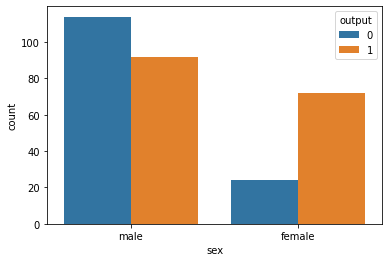

In [86]:
# We can see that 
sns.countplot(df["sex"], hue = df["output"]);

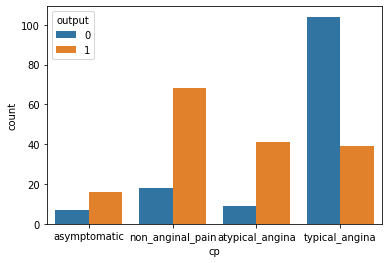

In [87]:
sns.countplot(df["cp"], hue = df["output"]);

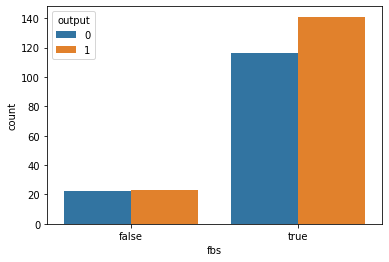

In [88]:
sns.countplot(df["fbs"], hue = df["output"]);

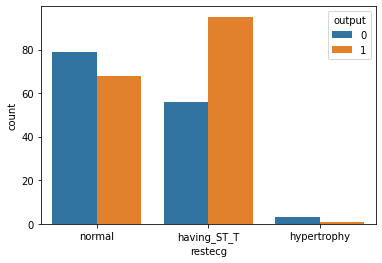

In [89]:
sns.countplot(df["restecg"], hue = df["output"]);

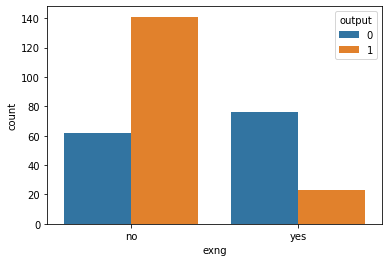

In [90]:
sns.countplot(df["exng"], hue = df["output"]);

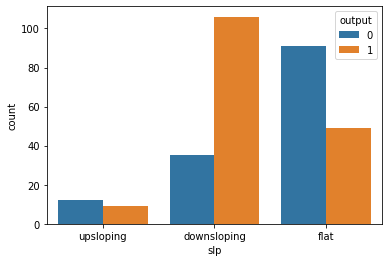

In [91]:
sns.countplot(df["slp"], hue = df["output"]);

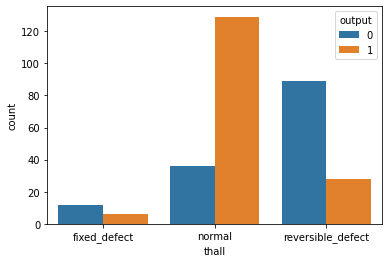

In [92]:
sns.countplot(df["thall"], hue = df["output"]);

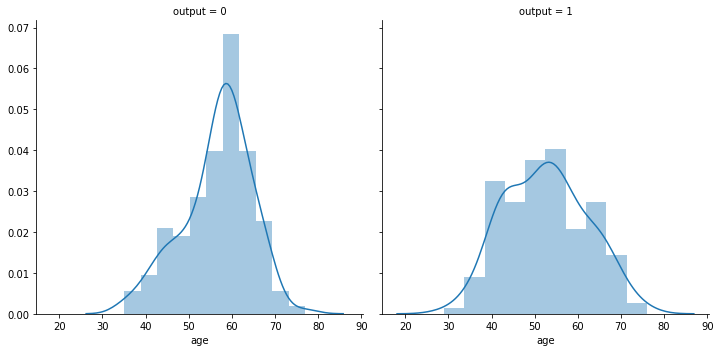

In [93]:
# Histogram Plots
(sns.FacetGrid(df,
             col = 'output', height = 5)
.map(sns.distplot,'age')
.add_legend()
);

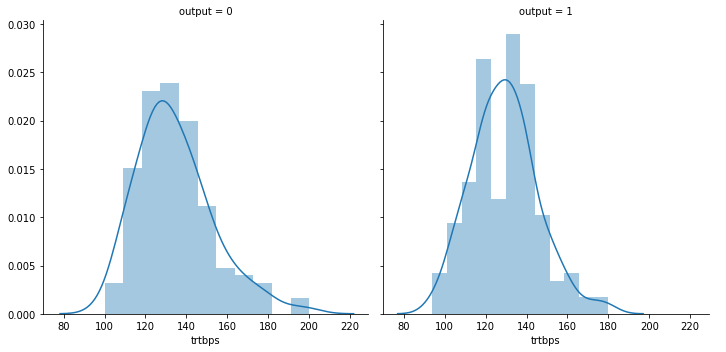

In [94]:
# Histogram Plots
(sns.FacetGrid(df,
             col = 'output', height = 5)
.map(sns.distplot,'trtbps')
.add_legend()
);

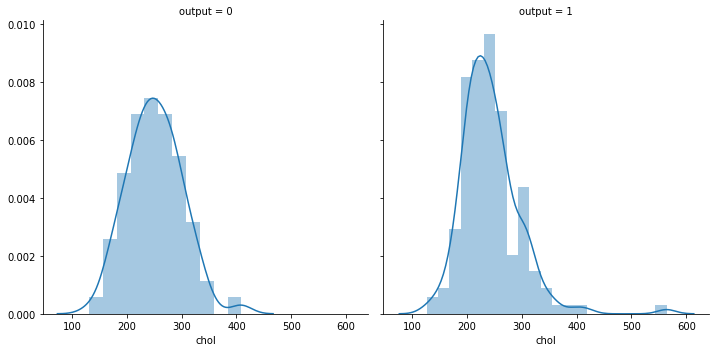

In [95]:
# Histogram Plots
(sns.FacetGrid(df,
             col = 'output', height = 5)
.map(sns.distplot,'chol')
.add_legend()
);

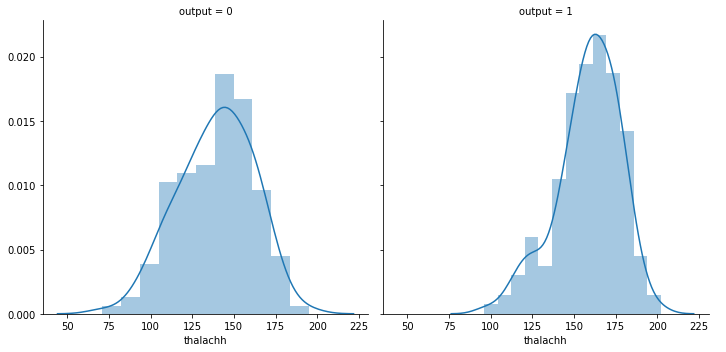

In [96]:
# Histogram Plots
(sns.FacetGrid(df,
             col = 'output', height = 5)
.map(sns.distplot,'thalachh')
.add_legend()
);

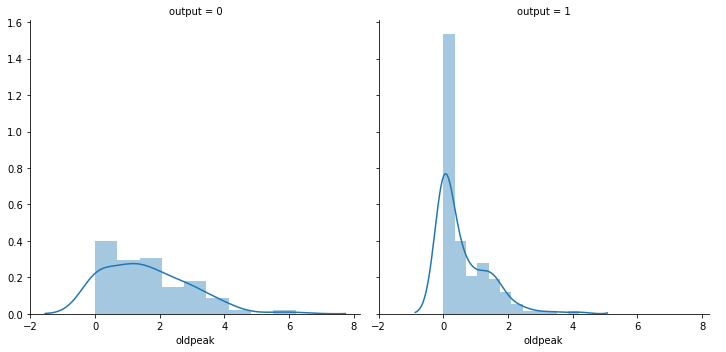

In [97]:
# Histogram Plots
(sns.FacetGrid(df,
             col = 'output', height = 5)
.map(sns.distplot,'oldpeak')
.add_legend()
);

In [99]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,male,asymptomatic,145,233,false,normal,150,no,2.3,upsloping,0,fixed_defect,1
1,37,male,non_anginal_pain,130,250,true,having_ST_T,187,no,3.5,upsloping,0,normal,1
2,41,female,atypical_angina,130,204,true,normal,172,no,1.4,downsloping,0,normal,1
3,56,male,atypical_angina,120,236,true,having_ST_T,178,no,0.8,downsloping,0,normal,1
4,57,female,typical_angina,120,354,true,having_ST_T,163,yes,0.6,downsloping,0,normal,1


In [100]:
df = pd.get_dummies(df, columns = ["sex", "cp", "fbs", "restecg", "exng", "slp", "thall"])

In [101]:
df.head(1)

,age,trtbps,chol,thalachh,oldpeak,caa,output,sex_female,sex_male,cp_asymptomatic,...,restecg_hypertrophy,restecg_normal,exng_no,exng_yes,slp_downsloping,slp_flat,slp_upsloping,thall_fixed_defect,thall_normal,thall_reversible_defect
0,63,145,233,150,2.3,0,1,0,1,1,...,0,1,1,0,0,0,1,1,0,0


In [107]:
df.dropna(inplace = True)

In [108]:
X = df.drop(["output", "sex_female", "fbs_false", "exng_no"], axis = 1)
y = df[["output"]]
print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)

Shape of X:  (302, 22)
Shape of y:  (302, 1)


In [109]:
# Rescale features
sc = StandardScaler()
scaled_X = sc.fit_transform(X)
scaled_X

array([[ 0.94979429,  0.76406571, -0.26128493, ...,  3.9721251 ,
        -1.09744228, -0.79525621],
       [-1.92854796, -0.09140084,  0.06774054, ..., -0.25175441,
         0.91120965, -0.79525621],
       [-1.48572607, -0.09140084, -0.82256367, ..., -0.25175441,
         0.91120965, -0.79525621],
       ...,
       [ 1.50332164,  0.70703461, -1.0354625 , ..., -0.25175441,
        -1.09744228,  1.25745639],
       [ 0.28556146, -0.09140084, -2.23543773, ..., -0.25175441,
        -1.09744228,  1.25745639],
       [ 0.28556146, -0.09140084, -0.20322161, ..., -0.25175441,
         0.91120965, -0.79525621]])

In [110]:
# Train Test split
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.20, random_state = 42)
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (241, 22)
Shape of X_test:  (61, 22)
Shape of y_train:  (241, 1)
Shape of y_test:  (61, 1)


### Make Prediction 

In [115]:
models = [GradientBoostingClassifier,
          RandomForestClassifier,
          DecisionTreeClassifier,
          MLPClassifier,
          KNeighborsClassifier,
          SVC]

In [116]:
def MakePrediction(algorithm):
    model = algorithm().fit(X_train, y_train)
    print(algorithm.__name__, " Train Score: ", model.score(X_train, y_train))
    print(algorithm.__name__, " Test Score: ", model.score(X_test, y_test))
    print("_______________________________________________________________")

In [117]:
for i in models:
    MakePrediction(i)

GradientBoostingClassifier  Train Score:  1.0
GradientBoostingClassifier  Test Score:  0.819672131147541
_______________________________________________________________
RandomForestClassifier  Train Score:  1.0
RandomForestClassifier  Test Score:  0.8852459016393442
_______________________________________________________________
DecisionTreeClassifier  Train Score:  1.0
DecisionTreeClassifier  Test Score:  0.8360655737704918
_______________________________________________________________
MLPClassifier  Train Score:  0.9377593360995851
MLPClassifier  Test Score:  0.9016393442622951
_______________________________________________________________
KNeighborsClassifier  Train Score:  0.8589211618257261
KNeighborsClassifier  Test Score:  0.8360655737704918
_______________________________________________________________
SVC  Train Score:  0.8962655601659751
SVC  Test Score:  0.8360655737704918
_______________________________________________________________


In [118]:
# As we can see, there are overfitting problem in most model. Lets handle them and optimize hyperparameters of each model  

## Model Tuning

### RandomForestClassifier

In [41]:
# Tuning
rf_model = RandomForestClassifier()

rf_params = {"max_depth": [2, 5, 8, 10],
             "n_estimators": [100, 500, 1000],
             "max_features": [2,5,8],
             "min_samples_split": [2,5,10]}

cv_rf_model = GridSearchCV(rf_model, rf_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [42]:
cv_rf_model.best_params_

{'max_depth': 2,
 'max_features': 2,
 'min_samples_split': 5,
 'n_estimators': 500}

In [121]:
tuned_rf = RandomForestClassifier(max_depth = 2,
                                  n_estimators = 500,
                                  max_features = 2, 
                                  min_samples_split =5, random_state = 42).fit(X_train, y_train)

In [122]:
y_pred = tuned_rf.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.8524590163934426


In [123]:
print("Test Score: ", tuned_rf.score(X_test, y_test))
print("Train Score: ", tuned_rf.score(X_train, y_train))

Test Score:  0.8524590163934426
Train Score:  0.8630705394190872


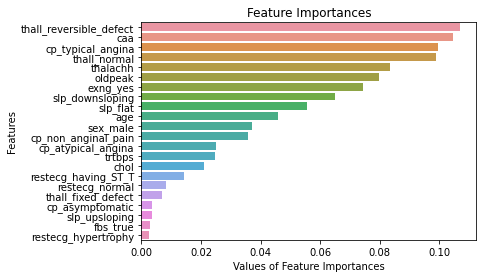

In [124]:
feature_imp = pd.Series(tuned_rf.feature_importances_,
                        index =pd.DataFrame(X_train, columns = X.columns).columns ).sort_values(ascending = False)

sns.barplot(x = feature_imp, y = feature_imp.index)
plt.xlabel("Values of Feature Importances")
plt.ylabel("Features")
plt.title("Feature Importances")
plt.show()

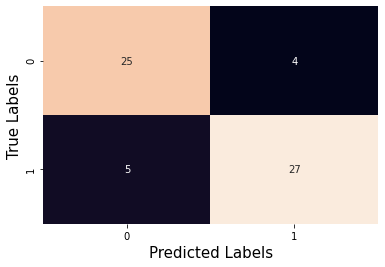

In [125]:
# Generate Confusion Matrix 
y_pred = tuned_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot = True, cbar = False, fmt = "g");
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

### KNN 

In [51]:
# Tuning
knn_model = KNeighborsClassifier()
knn_params = {"n_neighbors": np.arange(1,50)}

knn_cv_model = GridSearchCV(knn_model, knn_params, cv = 5).fit(X_train, y_train)

In [52]:
knn_cv_model.best_params_

{'n_neighbors': 29}

In [127]:
tuned_knn = KNeighborsClassifier(n_neighbors = 29).fit(X_train, y_train)

In [128]:
y_pred = tuned_knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.8852459016393442

In [129]:
print("Test Score: ", tuned_knn.score(X_test, y_test))
print("Train Score: ", tuned_knn.score(X_train, y_train))

Test Score:  0.8852459016393442
Train Score:  0.8298755186721992


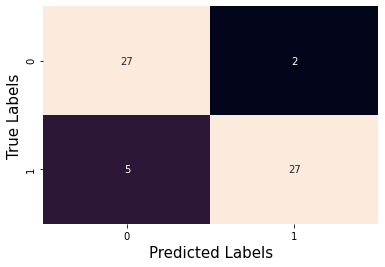

In [130]:
# Generate Confusion Matrix 
y_pred = tuned_knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot = True, cbar = False, fmt = "g");
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

### SVC

In [58]:
# Tuning
svc_model = SVC()
svc_params = {"C": np.arange(1,10), "kernel": ["linear", "rbf"]}
svc_cv_model = GridSearchCV(svc_model, svc_params, cv = 5).fit(X_train, y_train)
svc_cv_model.best_params_

{'C': 1, 'kernel': 'rbf'}

In [133]:
tuned_svc = SVC(C = 1, kernel = "rbf").fit(X_train, y_train)
tuned_svc.score(X_test, y_test)

0.8360655737704918

In [134]:
print("Test Score: ", tuned_svc.score(X_test, y_test))
print("Train Score: ", tuned_svc.score(X_train, y_train))

Test Score:  0.8360655737704918
Train Score:  0.8962655601659751


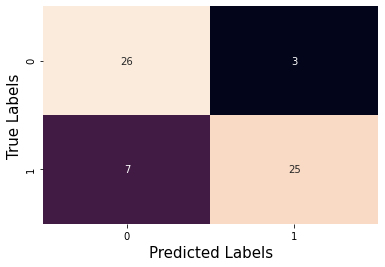

In [135]:
# Generate Confusion Matrix 
y_pred = tuned_svc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot = True, cbar = False, fmt = "g");
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

### MLP Classifier

In [63]:
# Tuning
mlp_model = MLPClassifier()
mlp_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001, 0.00001],
               "hidden_layer_sizes": [(10,10,10), (100,100,100), (100,100), (3,5), (5,3)],
               "solver": ["lbfgs", "adam", "sgd"],
               "activation": ["relu", "logistic"]}

mlp_cv_model = GridSearchCV(mlp_model,
                            mlp_params,
                            cv = 5,
                            n_jobs = -1,
                            verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [136]:
mlp_cv_model.best_params_

NameError: name 'mlp_cv_model' is not defined

In [137]:
tuned_mlp = MLPClassifier(activation = "logistic",
                          alpha = 1e-05,
                          hidden_layer_sizes = (100, 100, 100),
                          solver = "adam").fit(X_train, y_train)

In [138]:
print("Test Score: ", tuned_mlp.score(X_test, y_test))
print("Train Score: ", tuned_mlp.score(X_train, y_train))

Test Score:  0.8524590163934426
Train Score:  0.8713692946058091


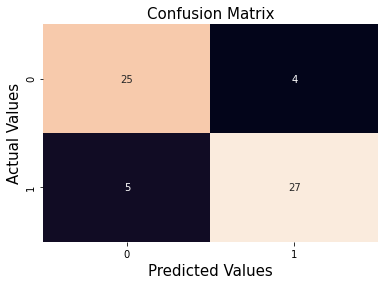

In [140]:
y_pred = tuned_mlp.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot = True, cbar = False)
ax.set_xlabel("Predicted Values", fontsize = 15)
ax.set_ylabel("Actual Values", fontsize = 15)
ax.set_title("Confusion Matrix", fontsize = 15)
plt.show()

### GradientBoostingClassifier

In [71]:
# Tuning
gbc_model = GradientBoostingClassifier()
gbc_params = {"learning_rate": [0.1, 0.01, 0.001, 0.05],
              "n_estimators": [100,500,1000],
              "max_depth": [3,5,10],
              "min_samples_split": [2, 5, 10]}

gbc_cv_model = GridSearchCV(gbc_model,
                            gbc_params,
                            cv = 5,
                            n_jobs = -1,
                            verbose = 2).fit(X_train, y_train)
gbc_cv_model.best_params_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


{'learning_rate': 0.05,
 'max_depth': 5,
 'min_samples_split': 2,
 'n_estimators': 100}

In [143]:
tuned_gbc = GradientBoostingClassifier(learning_rate = 0.05,
                                        max_depth = 3, 
                                        min_samples_split = 2,
                                        n_estimators = 100).fit(X_train, y_train)
tuned_gbc.score(X_test, y_test)

0.819672131147541

In [144]:
print("Test Score: ", tuned_gbc.score(X_test, y_test))
print("Train Score: ", tuned_gbc.score(X_train, y_train))

Test Score:  0.819672131147541
Train Score:  0.970954356846473


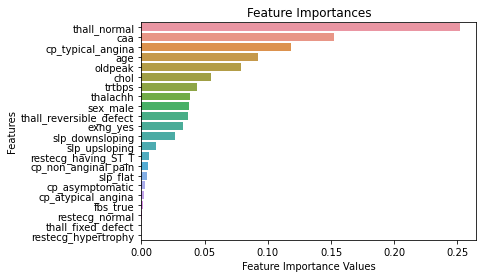

In [145]:
I = pd.Series(tunned_gbc.feature_importances_,
              index = X.columns).sort_values(ascending = False)

sns.barplot(x = I, y = I.index)
plt.xlabel("Feature Importance Values")
plt.ylabel("Features")
plt.title("Feature Importances")
plt.show()

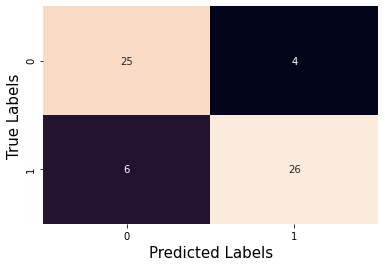

In [146]:
# Generate Confusion Matrix 
y_pred = tunned_gbc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot = True, cbar = False, fmt = "g");
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

### Comparing Models

In [147]:
tuned_models = ["Tuned Random Forest",
                "Tuned KNN", 
                "Tuned SVC", 
                "Tuned MLP",
                "Tuned Gradient Boosting"
               ] 

test_scores = [ tuned_rf.score(X_test, y_test),tuned_knn.score(X_test, y_test),
                tuned_svc.score(X_test, y_test),tuned_mlp.score(X_test, y_test),
                tunned_gbc.score(X_test, y_test)]

In [148]:
tuned_results = pd.DataFrame(test_scores, columns = ["Test Score"], index = tuned_models)
tuned_results

,Test Score
Tuned Random Forest,0.852459
Tuned KNN,0.885246
Tuned SVC,0.836066
Tuned MLP,0.852459
Tuned Gradient Boosting,0.836066


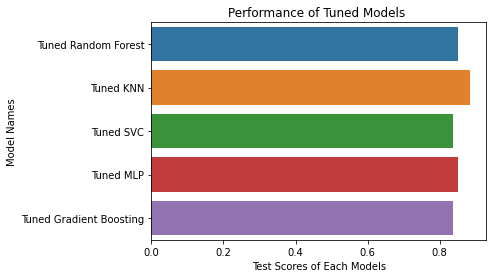

In [149]:
sns.barplot(x = tuned_results["Test Score"], y = tuned_results.index);

plt.xlabel("Test Scores of Each Models")
plt.ylabel("Model Names")
plt.title("Performance of Tuned Models ")
plt.show()